In [ ]:
!jt -t monokai -T -N -kl

In [4]:
!pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.4/136.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.0 MB/s eta 0:00:00


In [4]:
%cd /content/drive/MyDrive/coin

/content/drive/MyDrive/coin


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime


In [6]:
from binance import Client

In [7]:
client=Client()

BinanceAPIException: APIError(code=0): Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error.

In [8]:
info=client.get_exchange_info()

NameError: name 'client' is not defined

In [ ]:
sembol=[x['symbol'] for x in info['symbols']]

In [ ]:
sembol_usd=[symbol for symbol in sembol if symbol.endswith('USDT')]
sembol_usd


['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'TUSDUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'ONTUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'ICXUSDT',
 'VENUSDT',
 'NULSUSDT',
 'VETUSDT',
 'PAXUSDT',
 'BCHABCUSDT',
 'BCHSVUSDT',
 'USDCUSDT',
 'LINKUSDT',
 'WAVESUSDT',
 'BTTUSDT',
 'USDSUSDT',
 'ONGUSDT',
 'HOTUSDT',
 'ZILUSDT',
 'ZRXUSDT',
 'FETUSDT',
 'BATUSDT',
 'XMRUSDT',
 'ZECUSDT',
 'IOSTUSDT',
 'CELRUSDT',
 'DASHUSDT',
 'NANOUSDT',
 'OMGUSDT',
 'THETAUSDT',
 'ENJUSDT',
 'MITHUSDT',
 'MATICUSDT',
 'ATOMUSDT',
 'TFUELUSDT',
 'ONEUSDT',
 'FTMUSDT',
 'ALGOUSDT',
 'USDSBUSDT',
 'GTOUSDT',
 'ERDUSDT',
 'DOGEUSDT',
 'DUSKUSDT',
 'ANKRUSDT',
 'WINUSDT',
 'COSUSDT',
 'NPXSUSDT',
 'COCOSUSDT',
 'MTLUSDT',
 'TOMOUSDT',
 'PERLUSDT',
 'DENTUSDT',
 'MFTUSDT',
 'KEYUSDT',
 'STORMUSDT',
 'DOCKUSDT',
 'WANUSDT',
 'FUNUSDT',
 'CVCUSDT',
 'CHZUSDT',
 'BANDUSDT',
 'BUSDUSDT',
 'BEAMUSDT',
 'XTZUSDT',
 'RENUSDT',
 'RVNUSDT',
 'HCUSDT',
 'HBARUSD

# 1. aşama verileri çekerek ilk sefer için

In [ ]:
def getdetailydata(symbol):
    frame=pd.DataFrame(client.get_historical_klines(symbol,
                        '1h','30 days ago UTC'))
    if(len(frame)>0):
        frame=frame.iloc[:,:5]
        frame.columns=["Time","Open","High","Low","Close"]
        frame.set_index("Time")
        frame.index=pd.to_datetime(frame.index,unit="ms")
        frame=frame.astype(float)
        return frame

# '1d','365 days ago UTC'))

In [ ]:
eth=getdetailydata("ETHUSDT")

In [ ]:
dfs=[]
for coin in sembol_usd:
    dfs.append(getdetailydata(coin))


In [ ]:
mergedf=pd.concat(dict(zip(sembol_usd,dfs)),axis=1)
mergedf['Time']=mergedf['BTCUSDT']['Time']
mergedf.set_index('Time',inplace=True)
mergedf.head()

BTCUSDT                                              \
                      Time       Open       High        Low      Close   
Time                                                                     
1.758359e+12  1.758359e+12  115701.43  115794.39  115664.11  115672.80   
1.758362e+12  1.758362e+12  115672.80  115798.16  115672.79  115747.54   
1.758366e+12  1.758366e+12  115747.54  115909.54  115747.54  115894.06   
1.758370e+12  1.758370e+12  115894.05  115950.89  115804.47  115874.49   
1.758373e+12  1.758373e+12  115874.50  115951.96  115859.48  115915.80   

                   ETHUSDT                                      ...  \
                      Time     Open     High      Low    Close  ...   
Time                                                            ...   
1.758359e+12  1.758359e+12  4465.78  4472.18  4456.43  4465.91  ...   
1.758362e+12  1.758362e+12  4465.91  4475.72  4463.90  4463.91  ...   
1.758366e+12  1.758366e+12  4463.90  4471.29  4463.68  4469.96  ...   
1.758370e+12  1.758370e+12  4469.96  4471.00  4463.41  4465.80  ...   
1.758373e+12  1.758373e+12  4465.79  4471.54  4463.41  4468.15  ...   

                    YBUSDT                                       ZBTUSDT  \
                      Time    Open    High     Low   Close          Time   
Time                                                                       
1.758359e+12  1.760526e+12  0.3000  0.8444  0.3000  0.7164  1.760706e+12   
1.758362e+12  1.760530e+12  0.7166  0.7500  0.6542  0.6882  1.760710e+12   
1.758366e+12  1.760533e+12  0.6881  0.6969  0.6325  0.6880  1.760713e+12   
1.758370e+12  1.760537e+12  0.6878  0.6956  0.6201  0.6775  1.760717e+12   
1.758373e+12  1.760540e+12  0.6778  0.6842  0.6306  0.6496  1.760720e+12   

                                              
                Open    High     Low   Close  
Time                                          
1.758359e+12  0.3000  0.8887  0.3000  0.6237  
1.758362e+12  0.6238  0.6728  0.5412  0.5484  
1.758366e+12  0.5484  0.5541  0.4925  0.5107  
1.758370e+12  0.5110  0.5137  0.4360  0.4421  
1.758373e+12  0.4417  0.4424  0.4085  0.4109  

[5 rows x 2170 columns]

In [ ]:
mergedf.to_csv("mergedf.csv")

In [ ]:
closedf=mergedf.loc[:,mergedf.columns.get_level_values(1).isin(['Close'])]
closedf.columns=closedf.columns.droplevel(1)
closedf.to_csv("closedf.csv")
closedf

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,TUSDUSDT,IOTAUSDT,...,EDENUSDT,NOMUSDT,2ZUSDT,MORPHOUSDT,ASTERUSDT,WALUSDT,EULUSDT,ENSOUSDT,YBUSDT,ZBTUSDT
Time,,,,,,,,,,,,,,,,,,,,,
1.758359e+12,115672.80,4465.91,995.88,6.605,113.92,2.392,0.8912,2.9789,0.9967,0.1867,...,0.6530,0.04328,0.50285,1.922,2.143,0.3300,9.813,2.343,0.7164,0.6237
1.758362e+12,115747.54,4463.91,997.33,6.597,113.61,2.387,0.8891,2.9791,0.9968,0.1863,...,0.5498,0.04037,0.57225,1.916,2.062,0.3392,9.735,2.195,0.6882,0.5484
1.758366e+12,115894.06,4469.96,1001.77,6.622,113.97,2.398,0.8953,2.9891,0.9966,0.1871,...,0.5260,0.04103,0.56852,1.884,2.091,0.3309,9.632,2.507,0.6880,0.5107
1.758370e+12,115874.49,4465.80,1000.44,6.622,113.94,2.395,0.8950,2.9850,0.9964,0.1870,...,0.5410,0.04208,0.68952,1.919,2.128,0.3355,9.575,2.424,0.6775,0.4421
1.758373e+12,115915.80,4468.15,1000.44,6.617,113.76,2.390,0.8956,2.9835,0.9963,0.1869,...,0.4684,0.04086,0.70096,1.893,2.120,0.3298,9.592,2.524,0.6496,0.4109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.760933e+12,110422.10,4054.40,1127.31,5.252,94.69,2.026,0.6651,2.4466,0.9969,0.1471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.760936e+12,111033.79,4061.11,1132.88,5.252,95.27,2.025,0.6679,2.4565,0.9966,0.1472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.760940e+12,111298.55,4075.00,1132.96,5.276,95.57,2.033,0.6734,2.4686,0.9965,0.1489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
logretdf=np.log(closedf.pct_change()+1)
logretdf = logretdf.dropna()
logretdf.to_csv("logretdf.csv")
logretdf.head()


,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,TUSDUSDT,IOTAUSDT,...,EDENUSDT,NOMUSDT,2ZUSDT,MORPHOUSDT,ASTERUSDT,WALUSDT,EULUSDT,ENSOUSDT,YBUSDT,ZBTUSDT
Time,,,,,,,,,,,,,,,,,,,,,
1.758362e+12,0.000646,-0.000448,0.001455,-0.001212,-0.002725,-0.002092,-0.002359,0.000067,0.000100,-0.002145,...,-0.172023,-0.069604,0.129284,-0.003127,-0.038530,0.027497,-0.007980,-0.065250,-0.040159,-0.128665
1.758366e+12,0.001265,0.001354,0.004442,0.003782,0.003164,0.004598,0.006949,0.003351,-0.000201,0.004285,...,-0.044253,0.016217,-0.006539,-0.016843,0.013966,-0.024774,-0.010637,0.132905,-0.000291,-0.071223
1.758370e+12,-0.000169,-0.000931,-0.001329,0.000000,-0.000263,-0.001252,-0.000335,-0.001373,-0.000201,-0.000535,...,0.028118,0.025269,0.192959,0.018407,0.017540,0.013806,-0.005935,-0.033668,-0.015379,-0.144246
1.758373e+12,0.000356,0.000526,0.000000,-0.000755,-0.001581,-0.002090,0.000670,-0.000503,-0.000100,-0.000535,...,-0.144097,-0.029421,0.016455,-0.013641,-0.003766,-0.017136,0.001774,0.040426,-0.042053,-0.073186
1.758377e+12,0.000471,0.004250,0.011083,0.007378,0.004998,0.005425,0.002676,-0.000771,0.000000,0.009055,...,-0.087400,0.018910,-0.051792,0.009464,-0.016647,-0.007304,-0.014386,0.028897,0.079000,0.012335


# 2. aşama önceden veriler alımışsa buradan devam et

In [ ]:
logretdf= pd.read_csv("logretdf.csv")

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
logretdf[["ETHUSDT","SOLUSDT","DOTUSDT","RAREUSDT","SUPERUSDT"]].corr()

,ETHUSDT,SOLUSDT,DOTUSDT,RAREUSDT,SUPERUSDT
ETHUSDT,1.000000,0.857899,0.500182,0.307668,0.245786
SOLUSDT,0.857899,1.000000,0.628602,0.445477,0.301194
DOTUSDT,0.500182,0.628602,1.000000,0.831147,0.466534
RAREUSDT,0.307668,0.445477,0.831147,1.000000,0.452917
SUPERUSDT,0.245786,0.301194,0.466534,0.452917,1.000000


<AxesSubplot: >

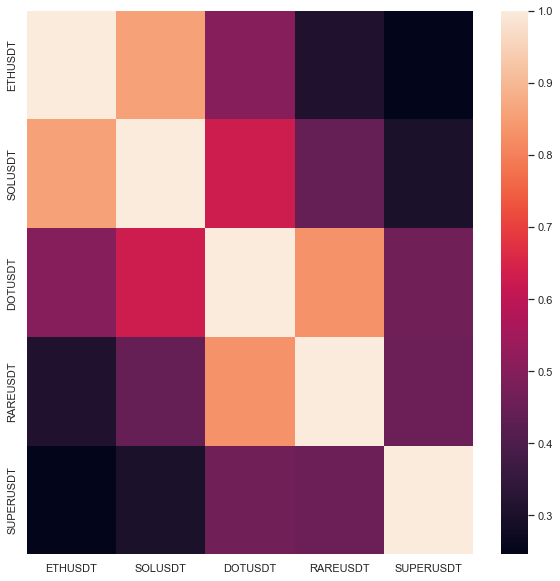

In [ ]:
sns.heatmap(logretdf[["ETHUSDT","SOLUSDT","DOTUSDT","RAREUSDT","SUPERUSDT"]].corr())

In [ ]:
cordf=logretdf.corr()
cordf.head()

,Time,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,TUSDUSDT,...,EDENUSDT,NOMUSDT,2ZUSDT,MORPHOUSDT,ASTERUSDT,WALUSDT,EULUSDT,ENSOUSDT,YBUSDT,ZBTUSDT
Time,1.000000,-0.011439,0.012165,-0.022520,0.010475,-0.008954,0.010259,0.002350,-0.004611,-0.035192,...,0.078031,0.052806,0.048191,0.010124,0.055244,0.057278,0.047134,0.023991,0.077435,0.128398
BTCUSDT,-0.011439,1.000000,0.815108,0.646569,0.527799,0.530881,0.472107,0.712939,0.748783,0.150727,...,-0.050092,0.003828,0.002558,0.029555,0.061994,-0.019296,0.023674,0.045750,0.014073,-0.031050
ETHUSDT,0.012165,0.815108,1.000000,0.619114,0.447807,0.458399,0.387016,0.670487,0.716883,0.183799,...,-0.040503,-0.003932,0.000566,0.030854,0.073972,0.000329,-0.004809,0.048962,0.018016,-0.018973
BNBUSDT,-0.022520,0.646569,0.619114,1.000000,0.658868,0.621883,0.595454,0.742532,0.710978,0.048634,...,-0.034688,-0.022840,-0.012821,0.023670,0.034550,-0.012890,-0.043559,0.022836,0.018570,0.000910
NEOUSDT,0.010475,0.527799,0.447807,0.658868,1.000000,0.848981,0.907826,0.897326,0.767531,-0.074784,...,-0.023964,-0.007076,0.001354,0.000638,0.042540,-0.005477,-0.006604,0.024896,0.022087,-0.008182


In [ ]:
hedef="SOLUSDT"

In [ ]:
largestdf=cordf[hedef].nlargest(10)
largestdf

SOLUSDT     1.000000
ETHUSDT     0.857899
BNTUSDT     0.832520
WBTCUSDT    0.800799
XRPUSDT     0.794924
BTCUSDT     0.792801
YFIUSDT     0.790217
RAYUSDT     0.789998
GLMUSDT     0.789210
VTHOUSDT    0.781947
Name: SOLUSDT, dtype: float64

# 3. Aşama
seçilen coine en yakın. 10 coini bulduk. Şimdi daha detaylı bakmak için bu 11 coinin daha detaylı verilerini indirelim

In [ ]:
secilen=list(largestdf.index)
secilen

['SOLUSDT',
 'ETHUSDT',
 'BNTUSDT',
 'WBTCUSDT',
 'XRPUSDT',
 'BTCUSDT',
 'YFIUSDT',
 'RAYUSDT',
 'GLMUSDT',
 'VTHOUSDT']

In [ ]:
closedf= pd.read_csv("closedf.csv")

In [ ]:
df_selected = pd.DataFrame()

for coin in secilen:
    # Extract time and close data for the current coin
    coin_data = closedf[['Time', coin]].rename(columns={coin: 'Close'})
    coin_data['Coin'] = coin  # Add coin identifier

    # Calculate logarithmic returns
    coin_data['Log_Ret'] = np.log(coin_data['Close'] / coin_data['Close'].shift(1))
    coin_data['Log_Ret'] = coin_data['Log_Ret'].dropna()  # Remove NaN from first row
    coin_data['Time'] = pd.to_datetime(coin_data['Time'], unit='ms', utc=True).dt.strftime('%D:%H:%M')

    # Normalize logarithmic returns using Z-score
    coin_data['Normalized'] = (coin_data['Log_Ret'] - coin_data['Log_Ret'].mean()) / coin_data['Log_Ret'].std()

    # Align time with logret and normalized (drop the first row of Time if needed)
    coin_data = coin_data.dropna()  # Ensures all columns align after shift

    # Append to df_selected
    df_selected = pd.concat([df_selected, coin_data], ignore_index=True)

# Reset index for clarity
df_selected = df_selected.reset_index(drop=True)

In [ ]:
df_selected.loc[df_selected['Coin'] == 'SOLUSDT']

,Time,Close,Coin,Log_Ret,Normalized
0,09/20/25:10:00,237.32,SOLUSDT,0.000337,0.071487
1,09/20/25:11:00,238.14,SOLUSDT,0.003449,0.431477
2,09/20/25:12:00,237.67,SOLUSDT,-0.001976,-0.196033
3,09/20/25:13:00,237.44,SOLUSDT,-0.000968,-0.079507
4,09/20/25:14:00,238.77,SOLUSDT,0.005586,0.678611
...,...,...,...,...,...
714,10/20/25:04:00,192.17,SOLUSDT,0.005008,0.611788
715,10/20/25:05:00,193.01,SOLUSDT,0.004362,0.537006
716,10/20/25:06:00,193.94,SOLUSDT,0.004807,0.588507
717,10/20/25:07:00,193.02,SOLUSDT,-0.004755,-0.517539


In [ ]:
def getdetailydata2(symbol):
    frame=pd.DataFrame(client.get_historical_klines(symbol,
                        '1m','2 days ago UTC'))
    if(len(frame)>0):
        frame=frame.iloc[:,:5]
        frame.columns=["Time","Open","High","Low","Close"]
        frame.set_index("Time")
        frame.index=pd.to_datetime(frame.index,unit="ms")
        frame=frame.astype(float)
        return frame

In [ ]:
dfs2=[]
secilen
for coin in secilen:
    dfs2.append(getdetailydata(coin))

In [ ]:
mergedf2=pd.concat(dict(zip(secilen,dfs2)),axis=1)
mergedf2['Time']=mergedf2[hedef]['Time']
mergedf2.set_index('Time',inplace=True)
#mergedf2['Time'] = pd.to_datetime(mergedf2['Time'], unit='ms', utc=True).dt.strftime('%D:%H:%M')

mergedf2.head()

SOLUSDT                                       ETHUSDT  \
                      Time    Open    High     Low   Close          Time   
Time                                                                       
1.758373e+12  1.758373e+12  237.66  238.09  237.37  237.44  1.758373e+12   
1.758377e+12  1.758377e+12  237.44  238.99  237.05  238.77  1.758377e+12   
1.758380e+12  1.758380e+12  238.77  241.22  238.77  240.10  1.758380e+12   
1.758384e+12  1.758384e+12  240.11  241.10  239.23  240.39  1.758384e+12   
1.758388e+12  1.758388e+12  240.40  240.56  238.92  239.14  1.758388e+12   

                                                  ...       GLMUSDT          \
                 Open     High      Low    Close  ...          Time    Open   
Time                                              ...                         
1.758373e+12  4465.79  4471.54  4463.41  4468.15  ...  1.758373e+12  0.2393   
1.758377e+12  4468.15  4496.78  4463.74  4487.18  ...  1.758377e+12  0.2395   
1.758380e+12  4487.19  4507.19  4487.00  4498.20  ...  1.758380e+12  0.2412   
1.758384e+12  4498.21  4508.71  4489.81  4502.57  ...  1.758384e+12  0.2417   
1.758388e+12  4502.56  4502.98  4470.00  4486.09  ...  1.758388e+12  0.2412   

                                          VTHOUSDT                      \
                High     Low   Close          Time      Open      High   
Time                                                                     
1.758373e+12  0.2400  0.2391  0.2396  1.758373e+12  0.001816  0.001819   
1.758377e+12  0.2413  0.2391  0.2411  1.758377e+12  0.001813  0.001827   
1.758380e+12  0.2424  0.2412  0.2416  1.758380e+12  0.001825  0.001832   
1.758384e+12  0.2419  0.2410  0.2413  1.758384e+12  0.001826  0.001828   
1.758388e+12  0.2412  0.2401  0.2410  1.758388e+12  0.001826  0.001827   

                                  
                   Low     Close  
Time                              
1.758373e+12  0.001811  0.001813  
1.758377e+12  0.001805  0.001825  
1.758380e+12  0.001824  0.001826  
1.758384e+12  0.001820  0.001826  
1.758388e+12  0.001816  0.001819  

[5 rows x 50 columns]

In [ ]:
closedf2=mergedf2.loc[:,mergedf2.columns.get_level_values(1).isin(['Close'])]
closedf2.columns=closedf2.columns.droplevel(1)
closedf2.to_csv("closedf2.csv")
closedf2.head()

,SOLUSDT,ETHUSDT,BNTUSDT,WBTCUSDT,XRPUSDT,BTCUSDT,YFIUSDT,RAYUSDT,GLMUSDT,VTHOUSDT
Time,,,,,,,,,,
1.758373e+12,237.44,4468.15,0.7198,115932.03,2.9835,115915.80,5320.0,3.140,0.2396,0.001813
1.758377e+12,238.77,4487.18,0.7248,115985.70,2.9812,115970.36,5360.0,3.170,0.2411,0.001825
1.758380e+12,240.10,4498.20,0.7270,116013.17,2.9893,115986.69,5385.0,3.182,0.2416,0.001826
1.758384e+12,240.39,4502.57,0.7274,116067.16,2.9915,116027.94,5387.0,3.171,0.2413,0.001826
1.758388e+12,239.14,4486.09,0.7245,115845.04,2.9824,115821.72,5367.0,3.156,0.2410,0.001819


In [ ]:
logretdf2=np.log(closedf2.pct_change()+1)
logretdf2 = logretdf2.dropna()
logretdf2.to_csv("logretdf2.csv")
logretdf2.head()

,SOLUSDT,ETHUSDT,BNTUSDT,WBTCUSDT,XRPUSDT,BTCUSDT,YFIUSDT,RAYUSDT,GLMUSDT,VTHOUSDT
Time,,,,,,,,,,
1.758377e+12,0.005586,0.004250,0.006922,0.000463,-0.000771,0.000471,0.007491,0.009509,0.006241,0.006597
1.758380e+12,0.005555,0.002453,0.003031,0.000237,0.002713,0.000141,0.004653,0.003778,0.002072,0.000548
1.758384e+12,0.001207,0.000971,0.000550,0.000465,0.000736,0.000356,0.000371,-0.003463,-0.001242,0.000000
1.758388e+12,-0.005213,-0.003667,-0.003995,-0.001916,-0.003047,-0.001779,-0.003720,-0.004742,-0.001244,-0.003841
1.758391e+12,-0.003057,-0.002426,-0.004011,-0.001052,-0.002619,-0.000952,-0.004108,-0.005720,-0.003325,-0.002201


In [15]:
corr_matrix=logretdf2.corr()
corr_matrix.head()

,Time,SOLUSDT,ETHUSDT,BNTUSDT,WBTCUSDT,XRPUSDT,BTCUSDT,YFIUSDT,RAYUSDT,GLMUSDT,VTHOUSDT
Time,1.000000,0.011431,0.010006,0.012678,-0.012388,-0.006658,-0.012243,-0.005421,-0.002098,0.002244,0.007976
SOLUSDT,0.011431,1.000000,0.857946,0.831791,0.800615,0.794328,0.792641,0.789916,0.790173,0.789269,0.781509
ETHUSDT,0.010006,0.857946,1.000000,0.858992,0.815841,0.716453,0.815168,0.778018,0.674221,0.738575,0.710796
BNTUSDT,0.012678,0.831791,0.858992,1.000000,0.762110,0.749871,0.754212,0.831338,0.743442,0.846264,0.770208
WBTCUSDT,-0.012388,0.800615,0.815841,0.762110,1.000000,0.764854,0.995152,0.714415,0.744512,0.736604,0.756626


In [17]:
corr_matrix.drop(columns="Time",inplace=True)
corr_matrix.drop(index="Time",inplace=True)
corr_matrix.head()

,SOLUSDT,ETHUSDT,BNTUSDT,WBTCUSDT,XRPUSDT,BTCUSDT,YFIUSDT,RAYUSDT,GLMUSDT,VTHOUSDT
SOLUSDT,1.000000,0.857946,0.831791,0.800615,0.794328,0.792641,0.789916,0.790173,0.789269,0.781509
ETHUSDT,0.857946,1.000000,0.858992,0.815841,0.716453,0.815168,0.778018,0.674221,0.738575,0.710796
BNTUSDT,0.831791,0.858992,1.000000,0.762110,0.749871,0.754212,0.831338,0.743442,0.846264,0.770208
WBTCUSDT,0.800615,0.815841,0.762110,1.000000,0.764854,0.995152,0.714415,0.744512,0.736604,0.756626
XRPUSDT,0.794328,0.716453,0.749871,0.764854,1.000000,0.747918,0.753577,0.854328,0.818620,0.863734


In [18]:
corr_matrix[hedef].nlargest(10)

NameError: name 'hedef' is not defined

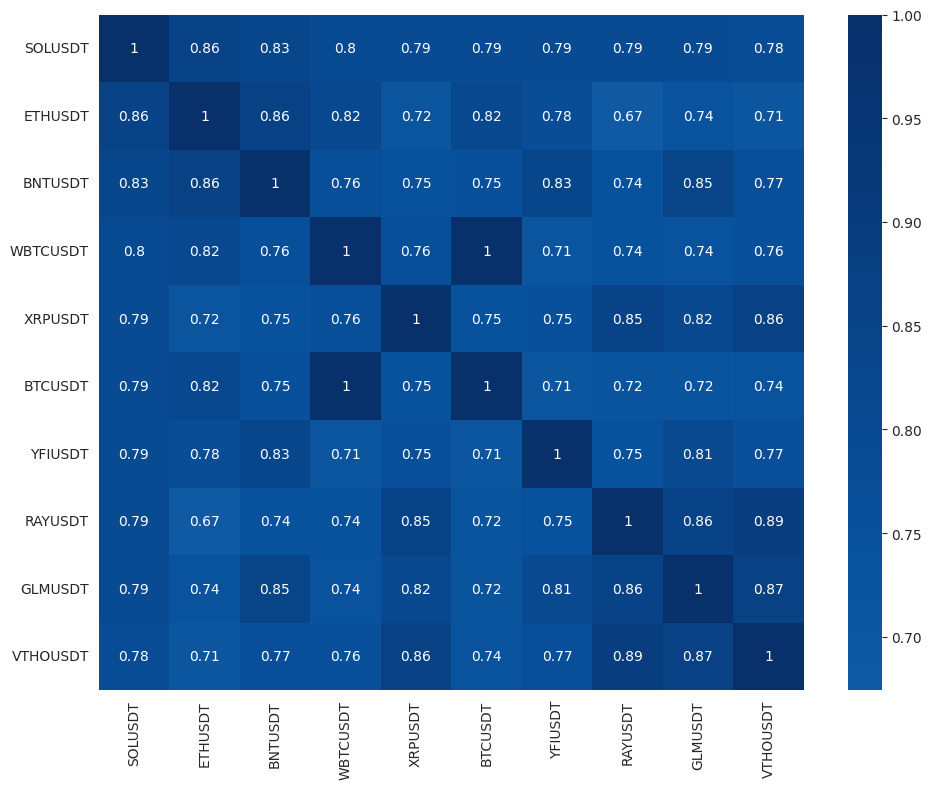

In [88]:
# Vizualizasyon: Heatmap ile göster (isteğe bağlı, ama faydalı)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
#plt.title('Saatlik Log Return Korelasyon Heatmap')
plt.tight_layout()
plt.savefig('fig/heatmap.png',dpi=300)
plt.show()

# Yön dataframe oluşturma


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
logretdf2=pd.read_csv("logretdf2.csv")
closedf2=pd.read_csv("closedf2.csv")

In [8]:
selected_coin = 'SOLUSDT'
logret_series = logretdf2[selected_coin].dropna()  # Extract series and drop NaN

In [26]:
mean_logret = logret_series.mean()
std_logret = logret_series.std()
normalized_series = (logret_series - mean_logret) / std_logret

/tmp/ipython-input-3676880288.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<StemContainer object of 3 artists>

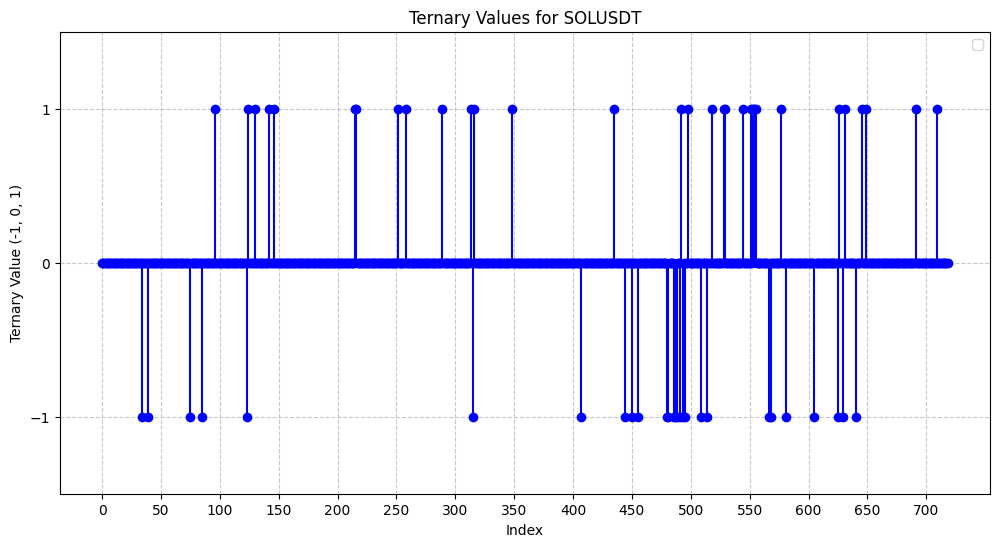

In [27]:
epsilon = 1.7  # User-defined tolerance threshold (e.g., 0.01)
ternary_series = pd.Series(np.where(normalized_series >= epsilon, 1,
np.where(normalized_series <= -epsilon, -1, 0)),
index=normalized_series.index)
x = np.arange(len(ternary_series))  # X-axis as index (or use logretdf2.index if time-based)
plt.figure(figsize=(12, 6))

plt.title(f'Ternary Values for {selected_coin}')
plt.xlabel('Index')
plt.ylabel('Ternary Value (-1, 0, 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([-1, 0, 1])
plt.ylim(-1.5, 1.5)
plt.xticks(x[::50])  # Adjust ticks based on data length

plt.stem(x, ternary_series, linefmt='b-', markerfmt='bo', basefmt=' ', label=selected_coin)

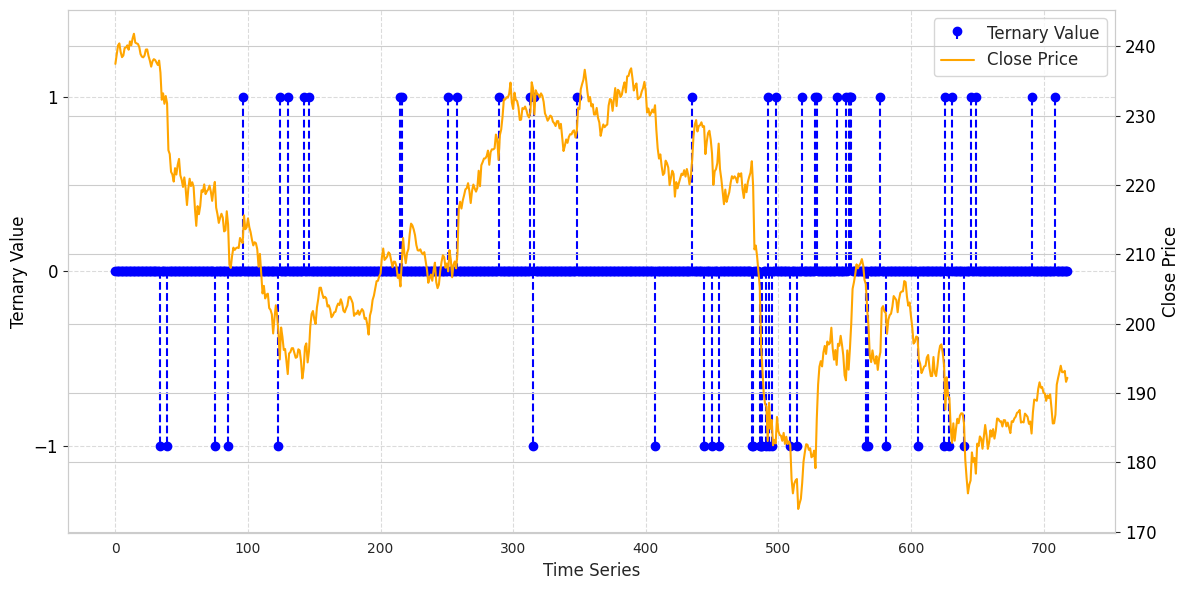

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming logretdf2 and closedf2 are your DataFrames
# logretdf2 contains log returns, closedf2 contains original close prices

# Step 1: Select the coin (replace 'SOLUSDT' with your desired coin)
selected_coin = 'SOLUSDT'

# Extract log return series and close price series, dropping NaN
logret_series = logretdf2[selected_coin].dropna()
close_series = closedf2[selected_coin].dropna()

# Align indices to ensure matching lengths
common_index = logret_series.index.intersection(close_series.index)
logret_series = logret_series[common_index]
close_series = close_series[common_index]

# Step 2: Normalize using Z-score
mean_logret = logret_series.mean()
std_logret = logret_series.std()
normalized_series = (logret_series - mean_logret) / std_logret

# Step 3: Apply ternary transformation with threshold
epsilon = 1.7  # User-defined tolerance threshold (e.g., 0.01)
ternary_series = pd.Series(np.where(normalized_series >= epsilon, 1,
                                    np.where(normalized_series <= -epsilon, -1, 0)),
                           index=normalized_series.index)

# Step 4: Create dual-axis lollipop graph
x = np.arange(len(ternary_series))  # X-axis as index

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: Ternary values (lollipop)
ax1.stem(x, ternary_series, linefmt='b--', markerfmt='bo', basefmt=' ', label='Ternary Value')
ax1.set_xlabel('Time Series',fontsize=12)
ax1.set_ylabel('Ternary Value', color='k',fontsize=12)
ax1.tick_params(axis='y', labelcolor='k',labelsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_yticks([-1, 0, 1])
ax1.set_ylim(-1.5, 1.5)


# Right y-axis: Close prices
ax2 = ax1.twinx()
ax2.plot(x, close_series, color='orange', label='Close Price')
ax2.set_ylabel('Close Price', color='k',fontsize=12)
ax2.tick_params(axis='y', labelcolor='k',labelsize=12)

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right',fontsize=12)

# Title and x-axis ticks
#plt.title(f'Ternary Values and Close Prices for {selected_coin}')
plt.xticks(x[::100])  # Adjust ticks based on data length
plt.tight_layout()
plt.savefig("fig/tern_close.png", dpi=300)
# Show the plot
plt.show()

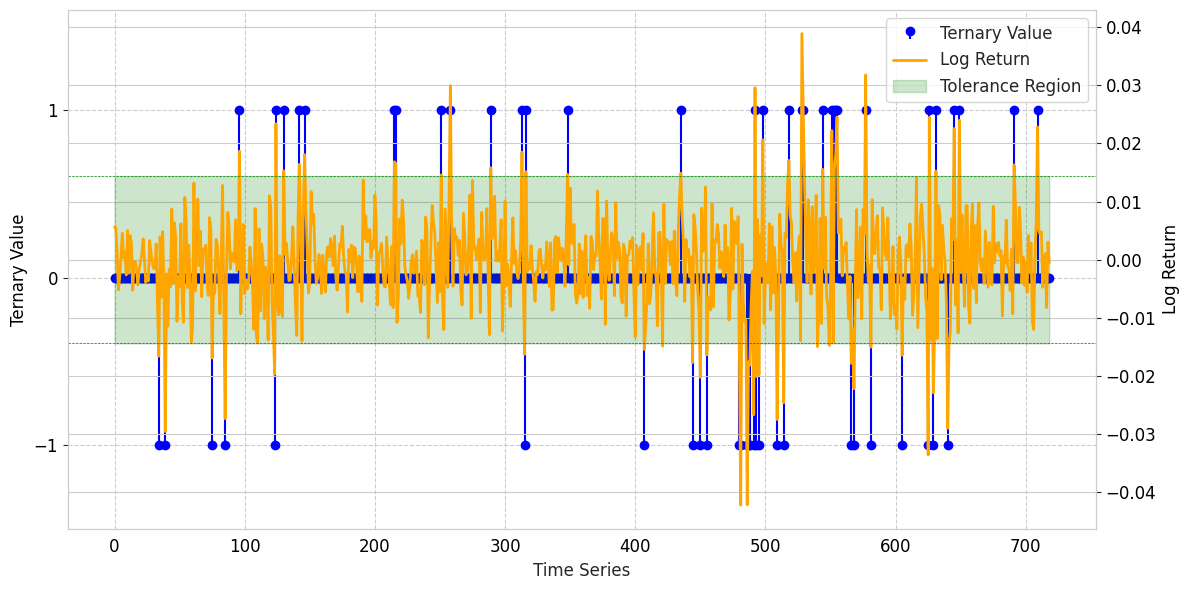

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming logretdf2 is your DataFrame with log returns for multiple coins
# Step 1: Select the coin (replace 'SOLUSDT' with your desired coin)
selected_coin = 'SOLUSDT'

# Extract log return series and drop NaN
logret_series = logretdf2[selected_coin].dropna()

# Step 2: Normalize using Z-score
mean_logret = logret_series.mean()
std_logret = logret_series.std()
normalized_series = (logret_series - mean_logret) / std_logret

# Step 3: Apply ternary transformation with threshold epsilon = 1.7
epsilon = 1.7  # Updated threshold as specified
ternary_series = pd.Series(np.where(normalized_series >= epsilon, 1,
                                    np.where(normalized_series <= -epsilon, -1, 0)),
                           index=normalized_series.index)

# Step 4: Create dual-axis lollipop graph
x = np.arange(len(ternary_series))  # X-axis as index
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")

# Left y-axis: Ternary values (lollipop)
ax1.stem(x, ternary_series, linefmt='b-', markerfmt='bo', basefmt=' ', label='Ternary Value')
ax1.set_xlabel('Time Series',fontsize=12)
ax1.set_ylabel('Ternary Value', color='k',fontsize=12)
ax1.tick_params(axis='both', labelcolor='k',labelsize=12)
ax1.grid(True, linestyle='--')
ax1.set_yticks([-1, 0, 1])
ax1.set_ylim(-1.5, 1.6)
# ax1.legend(loc='upper left')  # Commented out to remove from ax1

# Right y-axis: Logarithmic returns (bold line)
ax2 = ax1.twinx()
ax2.plot(x, logret_series, color='orange', label='Log Return', linewidth=2)  # Bold line with linewidth=2
ax2.set_ylabel('Log Return', color='k',fontsize=12)
ax2.tick_params(axis='y', labelcolor='k',labelsize=12)
# ax2.legend(loc='upper right')  # Commented out to remove from ax2

# Annotate the epsilon = 1.7 region on the right y-axis
epsilon_original = epsilon * std_logret + mean_logret  # Convert to original logret scale
ax2.axhline(y=epsilon_original, color='g', linestyle='--', linewidth=0.5)  # Thinned green line
ax2.axhline(y=-epsilon_original, color='g', linestyle='--', linewidth=0.5)  # Thinned green line
ax2.fill_between(x, -epsilon_original, epsilon_original, color='g', alpha=0.2, label='Tolerance Region')

# Adjust legend to include only the tolerance region
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + [lines2[0], lines2[-1]], labels1 + [labels2[0], labels2[-1]], loc='upper right',fontsize=12)  # Ternary and Log Return, Tolerance Region

# Title and x-axis ticks
#plt.title(f'Ternary Values and Log Returns for {selected_coin}')
plt.xticks(x[::100])  # Adjust ticks based on data length
plt.tick_params(axis='x', labelsize=12)
plt.tight_layout()
plt.savefig("fig/tern_logret.png", dpi=300)
# Show the plot
plt.show()

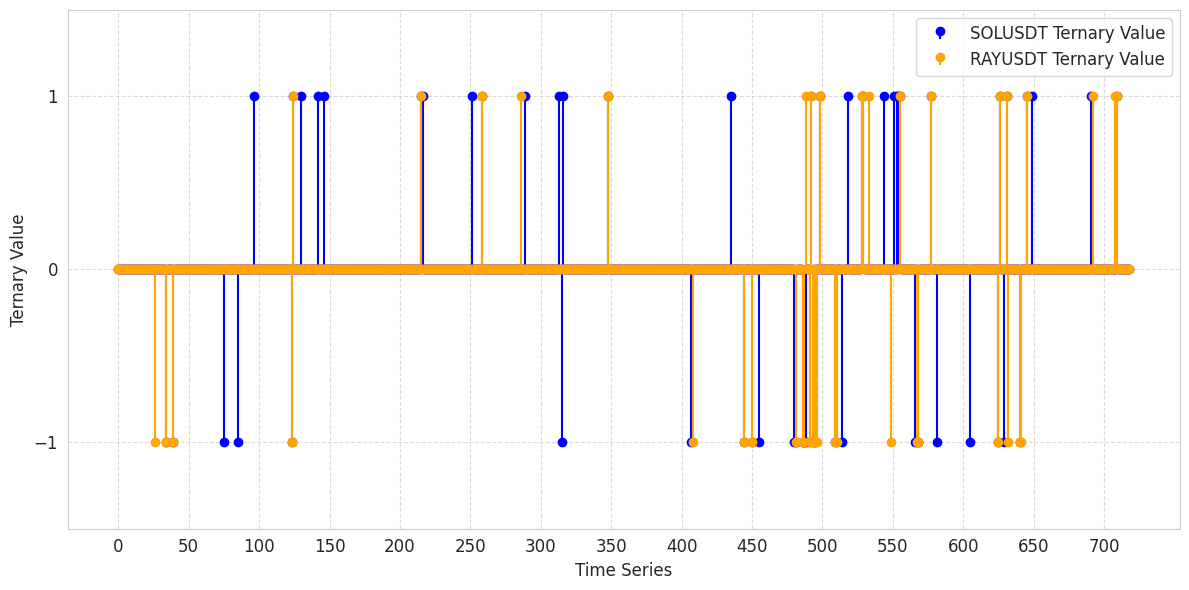

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming logretdf2 is your DataFrame with log returns for multiple coins
# Step 1: Select the coins (SOLUSDT and RAYUSDT)
coins = ['SOLUSDT', 'RAYUSDT']

# Extract log return series and drop NaN for both coins
logret_series_sol = logretdf2['SOLUSDT'].dropna()
logret_series_ray = logretdf2['RAYUSDT'].dropna()

# Align indices to ensure matching lengths
common_index = logret_series_sol.index.intersection(logret_series_ray.index)
logret_series_sol = logret_series_sol[common_index]
logret_series_ray = logret_series_ray[common_index]

# Step 2: Normalize using Z-score for both coins
mean_logret_sol = logret_series_sol.mean()
std_logret_sol = logret_series_sol.std()
normalized_series_sol = (logret_series_sol - mean_logret_sol) / std_logret_sol

mean_logret_ray = logret_series_ray.mean()
std_logret_ray = logret_series_ray.std()
normalized_series_ray = (logret_series_ray - mean_logret_ray) / std_logret_ray

# Step 3: Apply ternary transformation with threshold epsilon = 1.7
epsilon = 1.7  # Threshold as specified
ternary_series_sol = pd.Series(np.where(normalized_series_sol >= epsilon, 1,
                                        np.where(normalized_series_sol <= -epsilon, -1, 0)),
                               index=normalized_series_sol.index)
ternary_series_ray = pd.Series(np.where(normalized_series_ray >= epsilon, 1,
                                        np.where(normalized_series_ray <= -epsilon, -1, 0)),
                               index=normalized_series_ray.index)

# Step 4: Shift RAYUSDT data 3 units behind SOLUSDT
ternary_series_ray_shifted = ternary_series_ray.shift(0)  # Lag by 3 time steps
# Align lengths by taking the common index after shifting (drop NaN from shift)
common_index_shifted = ternary_series_sol.index.intersection(ternary_series_ray_shifted.dropna().index)
ternary_series_sol = ternary_series_sol[common_index_shifted]
ternary_series_ray_shifted = ternary_series_ray_shifted[common_index_shifted]

# Step 5: Create lollipop graphs
x = np.arange(len(ternary_series_sol))  # X-axis as index

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Lollipop for SOLUSDT
plt.stem(x, ternary_series_sol, linefmt='b-', markerfmt='bo', basefmt=' ', label='SOLUSDT Ternary Value')

# Lollipop for RAYUSDT (shifted)
plt.stem(x, ternary_series_ray_shifted,linefmt='orange', markerfmt='o', basefmt=' ', label='RAYUSDT Ternary Value')
# Graph settings
#plt.title('Ternary Values for SOLUSDT and RAYUSDT')
plt.xlabel('Time Series',fontsize=12)
plt.ylabel('Ternary Value',fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([-1, 0, 1])
plt.ylim(-1.5, 1.5)
plt.tick_params(axis='both', labelsize=12)
plt.xticks(x[::50])  # Adjust ticks based on data length
plt.tight_layout()
plt.savefig("fig/tern_solray.png", dpi=300)
# Show the plot
plt.show()

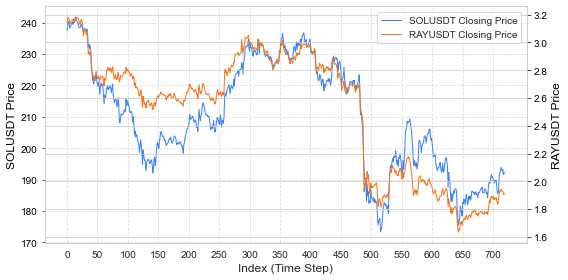

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Assuming closedf2 is your DataFrame with closing prices
# Extract closing price series and drop NaN for both coins
close_series_sol = closedf2['SOLUSDT'].dropna()
close_series_ray = closedf2['RAYUSDT'].dropna()

# Align indices to ensure matching lengths
common_index = close_series_sol.index.intersection(close_series_ray.index)
close_series_sol = close_series_sol[common_index]
close_series_ray = close_series_ray[common_index]

# Create the plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot SOLUSDT on the left y-axis
ax1.plot(common_index, close_series_sol, label='SOLUSDT Closing Price', color='#3b82f6', linewidth=1)
ax1.set_xlabel('Index (Time Step)', fontsize=12)
ax1.set_ylabel('SOLUSDT Price', color='k', fontsize=12)
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for RAYUSDT
ax2 = ax1.twinx()
ax2.plot(common_index, close_series_ray, label='RAYUSDT Closing Price', color='#f97316', linewidth=1)
ax2.set_ylabel('RAYUSDT Price', color='k', fontsize=12)
ax2.tick_params(axis='y', labelcolor='k')

# Add title and legend
#fig.suptitle('Closing Prices for SOLUSDT and RAYUSDT', fontsize=14, y=1.05)
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.96), ncol=1)

# Adjust x-axis ticks for readability (show every 50th index)
plt.xticks(common_index[::50], rotation=45)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

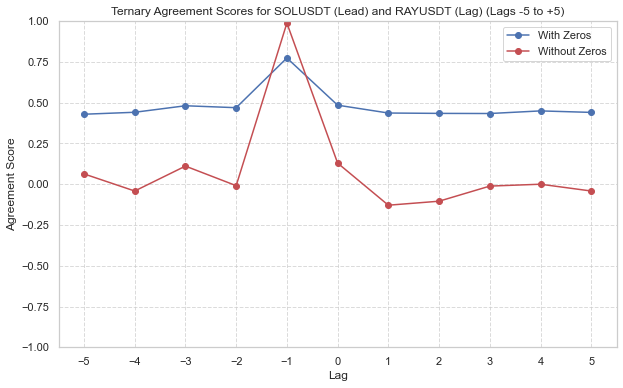

Ternary Uyum Scores Comparison for SOLUSDT (Lead) and RAYUSDT (Lag):
    With Zeros  Without Zeros
-5    0.429173       0.063291
-4    0.441176      -0.041667
-3    0.481119       0.111111
-2    0.469274      -0.008850
-1    0.774059       0.987952
 0    0.484680       0.129630
 1    0.436541      -0.128713
 2    0.434358      -0.104167
 3    0.433566      -0.011494
 4    0.449580       0.000000
 5    0.440393      -0.041667


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming logretdf2 is your DataFrame with log returns for multiple coins
# Step 1: Select the coins
coins = ['SOLUSDT', 'RAYUSDT']

# Extract log return series and drop NaN for both coins
logret_series_sol = logretdf2['SOLUSDT'].dropna()
logret_series_ray = logretdf2['RAYUSDT'].dropna()

# Align indices to ensure matching lengths
common_index = logret_series_sol.index.intersection(logret_series_ray.index)
logret_series_sol = logret_series_sol[common_index]
logret_series_ray = logret_series_ray[common_index]

# Step 2: Normalize using Z-score for both coins
mean_logret_sol = logret_series_sol.mean()
std_logret_sol = logret_series_sol.std()
normalized_series_sol = (logret_series_sol - mean_logret_sol) / std_logret_sol

mean_logret_ray = logret_series_ray.mean()
std_logret_ray = logret_series_ray.std()
normalized_series_ray = (logret_series_ray - mean_logret_ray) / std_logret_ray

# Step 3: Apply ternary transformation with threshold epsilon = 1.7
epsilon = 1.7  # Threshold as specified
ternary_series_sol = pd.Series(np.where(normalized_series_sol >= epsilon, 1,
                                        np.where(normalized_series_sol <= -epsilon, -1, 0)),
                               index=normalized_series_sol.index)
ternary_series_ray = pd.Series(np.where(normalized_series_ray >= epsilon, 1,
                                        np.where(normalized_series_ray <= -epsilon, -1, 0)),
                               index=normalized_series_ray.index)

# Step 4: Shift RAYUSDT data 3 units forward (SOL leads, RAY follows)
ternary_series_ray_shifted = ternary_series_ray.shift(-1)  # Positive shift to lag RAY behind SOL
# Align lengths by taking the common index after shifting (drop NaN from the end)
common_index_shifted = ternary_series_sol.index.intersection(ternary_series_ray_shifted.dropna().index)
ternary_series_sol = ternary_series_sol[common_index_shifted]
ternary_series_ray_shifted = ternary_series_ray_shifted[common_index_shifted]

# Step 5: Compute Adapted Ternary Agreement (TAM) for both methods
lags = range(-5, 6)  # -5 to +5 inclusive
uyum_scores_all = {'With Zeros': {}, 'Without Zeros': {}}

# Method 1: With zeros (original TAM)
for lag in lags:
    uyum = 0
    n_pairs = 0
    for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
        x_i = ternary_series_sol.iloc[i]
        y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
        if x_i == 0 and y_i_k == 0:
            uyum += 1
        else:
            uyum += x_i * y_i_k
        n_pairs += 1
    uyum_scores_all['With Zeros'][lag] = uyum / n_pairs if n_pairs > 0 else 0

# Method 2: Without zeros
for lag in lags:
    uyum = 0
    n_nonzero_pairs = 0
    for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
        x_i = ternary_series_sol.iloc[i]
        y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
        if x_i != 0 and y_i_k != 0:  # Only consider non-zero pairs
            uyum += x_i * y_i_k  # 1 for same direction, -1 for opposite
            n_nonzero_pairs += 1
    uyum_scores_all['Without Zeros'][lag] = uyum / n_nonzero_pairs if n_nonzero_pairs > 0 else 0

# Convert uyum_scores to DataFrame for tabulation
uyum_df = pd.DataFrame(uyum_scores_all)

# Save to CSV
uyum_df.to_csv('uyum_scores_SOL_RAY_comparison.csv')

# Step 6: Visualize with line plot
plt.figure(figsize=(10, 6))
plt.plot(uyum_df.index, uyum_df['With Zeros'], marker='o', color='b', label='With Zeros')
plt.plot(uyum_df.index, uyum_df['Without Zeros'], marker='o', color='r', label='Without Zeros')
plt.title('Ternary Agreement Scores for SOLUSDT (Lead) and RAYUSDT (Lag) (Lags -5 to +5)')
plt.xlabel('Lag')
plt.ylabel('Agreement Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(lags)
plt.ylim(-1, 1)  # Range for both methods
plt.legend()
plt.show()

# Display the table
print("Ternary Uyum Scores Comparison for SOLUSDT (Lead) and RAYUSDT (Lag):")
print(uyum_df)

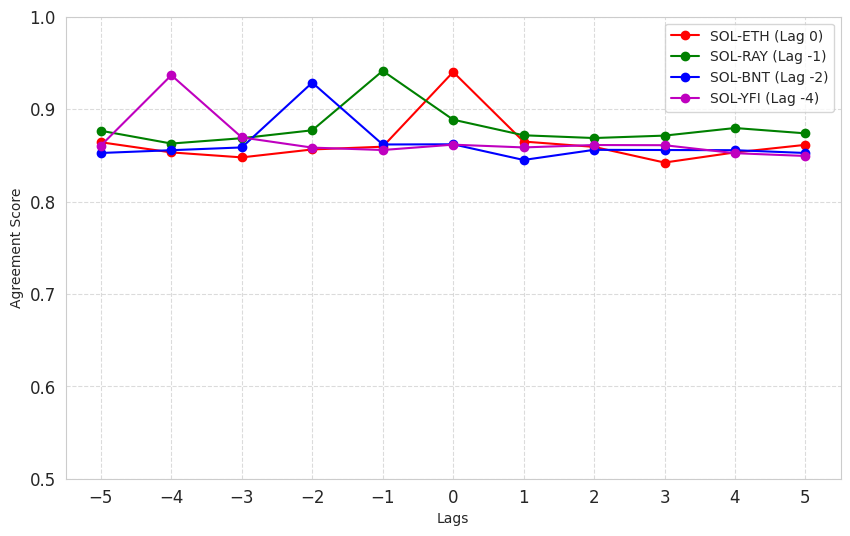

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coin çiftleri ve lag değerleri
pairs = {
    'SOL-ETH': 0,
    'SOL-RAY': -1,
    'SOL-BNT': -2,
    'SOL-YFI': -4
}

# Z-score eşiği
epsilon = 1.7

# Lags for TAM hesaplaması
lags = range(-5, 6)

# Grafik için renkler
colors = ['r', 'g', 'b', 'm']

plt.figure(figsize=(10, 6))

for (pair, shift_val), color in zip(pairs.items(), colors):
    sol_coin = 'SOLUSDT'
    other_coin = pair.split('-')[1] + 'USDT'

    # 1️⃣ Verileri al ve hizala
    logret_series_sol = logretdf2[sol_coin].dropna()
    logret_series_other = logretdf2[other_coin].dropna()
    common_index = logret_series_sol.index.intersection(logret_series_other.index)
    logret_series_sol = logret_series_sol[common_index]
    logret_series_other = logret_series_other[common_index]

    # 2️⃣ Z-score normalizasyonu
    norm_sol = (logret_series_sol - logret_series_sol.mean()) / logret_series_sol.std()
    norm_other = (logret_series_other - logret_series_other.mean()) / logret_series_other.std()

    # 3️⃣ Ternary dönüşüm
    tern_sol = pd.Series(np.where(norm_sol >= epsilon, 1,
                                  np.where(norm_sol <= -epsilon, -1, 0)),
                         index=norm_sol.index)
    tern_other = pd.Series(np.where(norm_other >= epsilon, 1,
                                    np.where(norm_other <= -epsilon, -1, 0)),
                           index=norm_other.index)

    # 4️⃣ Belirtilen lag kadar kaydır (SOL önde)
    tern_other_shifted = tern_other.shift(shift_val)
    common_index_shifted = tern_sol.index.intersection(tern_other_shifted.dropna().index)
    tern_sol = tern_sol[common_index_shifted]
    tern_other_shifted = tern_other_shifted[common_index_shifted]

    # 5️⃣ TAM Method 1: With Zeros
    uyum_scores = {}
    for lag in lags:
        uyum = 0
        n_pairs = 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x_i = tern_sol.iloc[i]
            y_i_k = tern_other_shifted.iloc[i + lag] if 0 <= i + lag < len(tern_other_shifted) else 0
            # Method 1 (With zeros)
            if x_i == 0 and y_i_k == 0:
                uyum += 1
            else:
                uyum += x_i * y_i_k
            n_pairs += 1
        uyum_scores[lag] = uyum / n_pairs if n_pairs > 0 else 0

    # 6️⃣ Çizim
    plt.plot(list(uyum_scores.keys()), list(uyum_scores.values()),
             marker='o', color=color, label=f'{pair} (Lag {shift_val})')

# 7️⃣ Grafik biçimlendirme
#plt.title('TAM Method 1 (With Zeros) - SOL Lead Pairs')
plt.xlabel('Lags')
plt.ylabel('Agreement Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(lags,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.5, 1)
plt.legend()
plt.savefig("fig/tamz_sol.png", dpi=300)
plt.show()


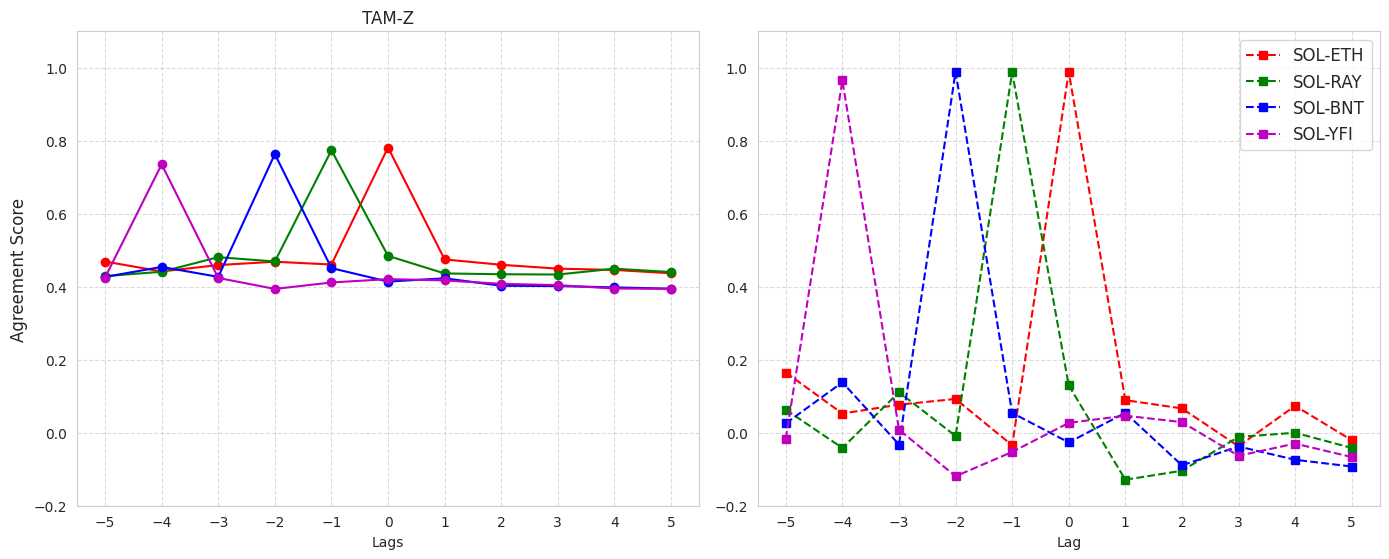

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coin çiftleri ve kaydırma değerleri
pairs = {
    'SOL-ETH': 0,
    'SOL-RAY': -1,
    'SOL-BNT': -2,
    'SOL-YFI': -4
}

epsilon = 0.7
lags = range(-5, 6)
colors = ['r', 'g', 'b', 'm']

# --- 2 subplot: Method 1 (sol) & Method 2 (sağ) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

for (pair, shift_val), color in zip(pairs.items(), colors):
    sol_coin = 'SOLUSDT'
    other_coin = pair.split('-')[1] + 'USDT'

    # 1️⃣ Verileri hizala
    logret_sol = logretdf2[sol_coin].dropna()
    logret_other = logretdf2[other_coin].dropna()
    common_index = logret_sol.index.intersection(logret_other.index)
    logret_sol = logret_sol[common_index]
    logret_other = logret_other[common_index]

    # 2️⃣ Normalize (Z-score)
    norm_sol = (logret_sol - logret_sol.mean()) / logret_sol.std()
    norm_other = (logret_other - logret_other.mean()) / logret_other.std()

    # 3️⃣ Ternary dönüşüm
    tern_sol = pd.Series(np.where(norm_sol >= epsilon, 1,
                                  np.where(norm_sol <= -epsilon, -1, 0)),
                         index=norm_sol.index)
    tern_other = pd.Series(np.where(norm_other >= epsilon, 1,
                                    np.where(norm_other <= -epsilon, -1, 0)),
                           index=norm_other.index)

    # 4️⃣ Kaydırma
    tern_other_shifted = tern_other.shift(shift_val)
    common_index_shifted = tern_sol.index.intersection(tern_other_shifted.dropna().index)
    tern_sol = tern_sol[common_index_shifted]
    tern_other_shifted = tern_other_shifted[common_index_shifted]

    # --- Method 1: With Zeros ---
    uyum_m1 = {}
    for lag in lags:
        uyum, n = 0, 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x = tern_sol.iloc[i]
            y = tern_other_shifted.iloc[i + lag]
            if x == 0 and y == 0:
                uyum += 1
            else:
                uyum += x * y
            n += 1
        uyum_m1[lag] = uyum / n if n > 0 else 0

    ax1.plot(list(uyum_m1.keys()), list(uyum_m1.values()),
             marker='o', color=color, label=f'{pair}')

    # --- Method 2: Without Zeros ---
    uyum_m2 = {}
    for lag in lags:
        uyum, n = 0, 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x = tern_sol.iloc[i]
            y = tern_other_shifted.iloc[i + lag]
            if x != 0 and y != 0:
                uyum += x * y
                n += 1
        uyum_m2[lag] = uyum / n if n > 0 else 0

    ax2.plot(list(uyum_m2.keys()), list(uyum_m2.values()),
             marker='s', linestyle='--', color=color, label=f'{pair}')

# --- Sol grafik (Method 1) ---
ax1.set_title('TAM-Z')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Agreement Score',fontsize=12)
ax1.set_xticks(lags)
ax1.set_ylim(-0.2, 1.1)
ax1.grid(True, linestyle='--', alpha=0.7)
#ax1.legend(fontsize=12)

# --- Sağ grafik (Method 2) ---
##ax2.set_title('TAM-NZ')
ax2.set_xlabel('Lag')
ax2.set_xticks(lags)
ax2.set_ylim(-0.2, 1.1)  # ← burada Method 2 eksen ölçeğini istediğin gibi ayarlayabilirsin
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(fontsize=12)

#plt.suptitle('Ternary Agreement Measure (TAM) – SOL Lead Pairs', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig/tamz_tamnz_sol.png", dpi=300)
plt.show()

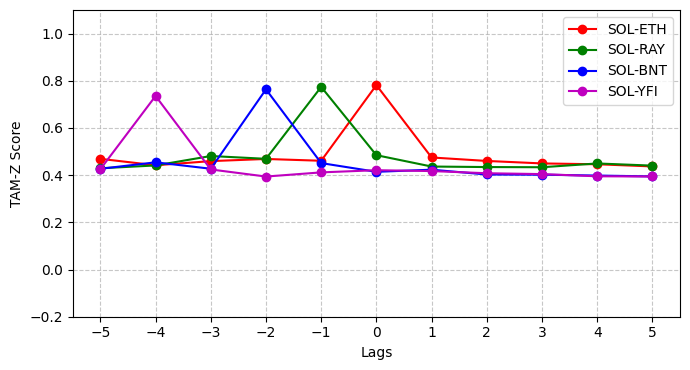

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coin çiftleri ve kaydırma değerleri
pairs = {
    'SOL-ETH': 0,
    'SOL-RAY': -1,
    'SOL-BNT': -2,
    'SOL-YFI': -4
}

epsilon = 0.7
lags = range(-5, 6)
colors = ['r', 'g', 'b', 'm']

# --- Single plot ---
fig, ax = plt.subplots(figsize=(7, 4))

for (pair, shift_val), color in zip(pairs.items(), colors):
    sol_coin = 'SOLUSDT'
    other_coin = pair.split('-')[1] + 'USDT'

    # 1️⃣ Verileri hizala
    logret_sol = logretdf2[sol_coin].dropna()
    logret_other = logretdf2[other_coin].dropna()
    common_index = logret_sol.index.intersection(logret_other.index)
    logret_sol = logret_sol[common_index]
    logret_other = logret_other[common_index]

    # 2️⃣ Normalize (Z-score)
    norm_sol = (logret_sol - logret_sol.mean()) / logret_sol.std()
    norm_other = (logret_other - logret_other.mean()) / logret_other.std()

    # 3️⃣ Ternary dönüşüm
    tern_sol = pd.Series(np.where(norm_sol >= epsilon, 1,
                                  np.where(norm_sol <= -epsilon, -1, 0)),
                         index=norm_sol.index)
    tern_other = pd.Series(np.where(norm_other >= epsilon, 1,
                                    np.where(norm_other <= -epsilon, -1, 0)),
                           index=norm_other.index)

    # 4️⃣ Kaydırma
    tern_other_shifted = tern_other.shift(shift_val)
    common_index_shifted = tern_sol.index.intersection(tern_other_shifted.dropna().index)
    tern_sol = tern_sol[common_index_shifted]
    tern_other_shifted = tern_other_shifted[common_index_shifted]

  # --- Method 1: With Zeros ---
    uyum_m1 = {}
    for lag in lags:
        uyum, n = 0, 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x = tern_sol.iloc[i]
            y = tern_other_shifted.iloc[i + lag]
            if x == 0 and y == 0:
                uyum += 1
            else:
                uyum += x * y
            n += 1
        uyum_m1[lag] = uyum / n if n > 0 else 0

    ax.plot(list(uyum_m1.keys()), list(uyum_m1.values()),
             marker='o', color=color, label=f'{pair}')


# --- Plot settings ---
ax.set_xlabel('Lags', fontsize=10)
ax.set_ylabel('TAM-Z Score', fontsize=10)
ax.set_xticks(lags)
ax.set_ylim(-0.2, 1.1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)
ax.tick_params(axis='both', labelsize=10)  # Set x and y tick font size to 12

#plt.suptitle('Ternary Agreement Measure (TAM) – SOL Lead Pairs', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig/tamz_sol.png", dpi=300)
plt.show()

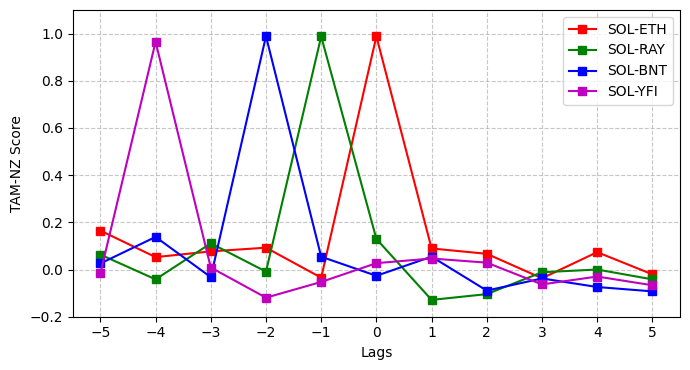

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coin çiftleri ve kaydırma değerleri
pairs = {
    'SOL-ETH': 0,
    'SOL-RAY': -1,
    'SOL-BNT': -2,
    'SOL-YFI': -4
}

epsilon = 0.7
lags = range(-5, 6)
colors = ['r', 'g', 'b', 'm']

# --- Single plot ---
fig, ax = plt.subplots(figsize=(7, 4))

for (pair, shift_val), color in zip(pairs.items(), colors):
    sol_coin = 'SOLUSDT'
    other_coin = pair.split('-')[1] + 'USDT'

    # 1️⃣ Verileri hizala
    logret_sol = logretdf2[sol_coin].dropna()
    logret_other = logretdf2[other_coin].dropna()
    common_index = logret_sol.index.intersection(logret_other.index)
    logret_sol = logret_sol[common_index]
    logret_other = logret_other[common_index]

    # 2️⃣ Normalize (Z-score)
    norm_sol = (logret_sol - logret_sol.mean()) / logret_sol.std()
    norm_other = (logret_other - logret_other.mean()) / logret_other.std()

    # 3️⃣ Ternary dönüşüm
    tern_sol = pd.Series(np.where(norm_sol >= epsilon, 1,
                                  np.where(norm_sol <= -epsilon, -1, 0)),
                         index=norm_sol.index)
    tern_other = pd.Series(np.where(norm_other >= epsilon, 1,
                                    np.where(norm_other <= -epsilon, -1, 0)),
                           index=norm_other.index)

    # 4️⃣ Kaydırma
    tern_other_shifted = tern_other.shift(shift_val)
    common_index_shifted = tern_sol.index.intersection(tern_other_shifted.dropna().index)
    tern_sol = tern_sol[common_index_shifted]
    tern_other_shifted = tern_other_shifted[common_index_shifted]

    # --- Method 2: Without Zeros ---
    uyum_m2 = {}
    for lag in lags:
        uyum, n = 0, 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x = tern_sol.iloc[i]
            y = tern_other_shifted.iloc[i + lag]
            if x != 0 and y != 0:
                uyum += x * y
                n += 1
        uyum_m2[lag] = uyum / n if n > 0 else 0

    ax.plot(list(uyum_m2.keys()), list(uyum_m2.values()),
            marker='s', linestyle='-', color=color, label=f'{pair}')

# --- Plot settings ---
ax.set_xlabel('Lags', fontsize=10)
ax.set_ylabel('TAM-NZ Score', fontsize=10)
ax.set_xticks(lags)
ax.set_ylim(-0.2, 1.1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)
ax.tick_params(axis='both', labelsize=10)  # Set x and y tick font size to 12

#plt.suptitle('Ternary Agreement Measure (TAM) – SOL Lead Pairs', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig/tamnz_sol.png", dpi=300)
plt.show()

In [ ]:
# --- DataFrame oluşturma ---
data_records = []

for (pair, shift_val), color in zip(pairs.items(), colors):
    sol_coin = 'SOLUSDT'
    other_coin = pair.split('-')[1] + 'USDT'

    # 1️⃣ Verileri hizala
    logret_sol = logretdf2[sol_coin].dropna()
    logret_other = logretdf2[other_coin].dropna()
    common_index = logret_sol.index.intersection(logret_other.index)
    logret_sol = logret_sol[common_index]
    logret_other = logret_other[common_index]

    # 2️⃣ Normalize
    norm_sol = (logret_sol - logret_sol.mean()) / logret_sol.std()
    norm_other = (logret_other - logret_other.mean()) / logret_other.std()

    # 3️⃣ Ternary
    tern_sol = pd.Series(np.where(norm_sol >= epsilon, 1,
                                  np.where(norm_sol <= -epsilon, -1, 0)),
                         index=norm_sol.index)
    tern_other = pd.Series(np.where(norm_other >= epsilon, 1,
                                    np.where(norm_other <= -epsilon, -1, 0)),
                           index=norm_other.index)

    # 4️⃣ Kaydırma
    tern_other_shifted = tern_other.shift(shift_val)
    common_index_shifted = tern_sol.index.intersection(tern_other_shifted.dropna().index)
    tern_sol = tern_sol[common_index_shifted]
    tern_other_shifted = tern_other_shifted[common_index_shifted]

    # --- Method 1 ---
    for lag in lags:
        uyum, n = 0, 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x = tern_sol.iloc[i]
            y = tern_other_shifted.iloc[i + lag]
            if x == 0 and y == 0:
                uyum += 1
            else:
                uyum += x * y
            n += 1
        uyum_m1 = uyum / n if n > 0 else 0

        # --- Method 2 ---
        uyum, n = 0, 0
        for i in range(max(0, -lag), len(tern_sol) - max(0, lag)):
            x = tern_sol.iloc[i]
            y = tern_other_shifted.iloc[i + lag]
            if x != 0 and y != 0:
                uyum += x * y
                n += 1
        uyum_m2 = uyum / n if n > 0 else 0

        data_records.append([pair, lag, uyum_m1, uyum_m2])

# --- Tablolaştır ---
df_results = pd.DataFrame(data_records, columns=['Pair', 'Lag', 'TAM-Z', 'TAM-NZ'])

# En yüksek korelasyonları (maksimum uyum) görmek istersen:
df_summary = df_results.loc[df_results.groupby('Pair')['TAM-Z'].idxmax(), ['Pair', 'Lag', 'TAM-Z']]
df_summary['TAM-NZ'] = df_results.loc[df_results.groupby('Pair')['TAM-NZ'].idxmax(), 'TAM-NZ'].values

print(df_results.head(10))      # tüm lag değerleri
print("\n--- En yüksek uyum değerleri ---")
print(df_summary)


      Pair  Lag     TAM-Z    TAM-NZ
0  SOL-ETH   -5  0.469188  0.165049
1  SOL-ETH   -4  0.441958  0.052632
2  SOL-ETH   -3  0.459497  0.076923
3  SOL-ETH   -2  0.468619  0.092593
4  SOL-ETH   -1  0.461003 -0.034483
5  SOL-ETH    0  0.781641  0.988372
6  SOL-ETH    1  0.474930  0.089286
7  SOL-ETH    2  0.460251  0.066667
8  SOL-ETH    3  0.449721 -0.037037
9  SOL-ETH    4  0.446154  0.073684

--- En yüksek uyum değerleri ---
       Pair  Lag     TAM-Z    TAM-NZ
25  SOL-BNT   -2  0.763636  0.988950
5   SOL-ETH    0  0.781641  0.988372
15  SOL-RAY   -1  0.774059  0.987952
34  SOL-YFI   -4  0.735584  0.965318


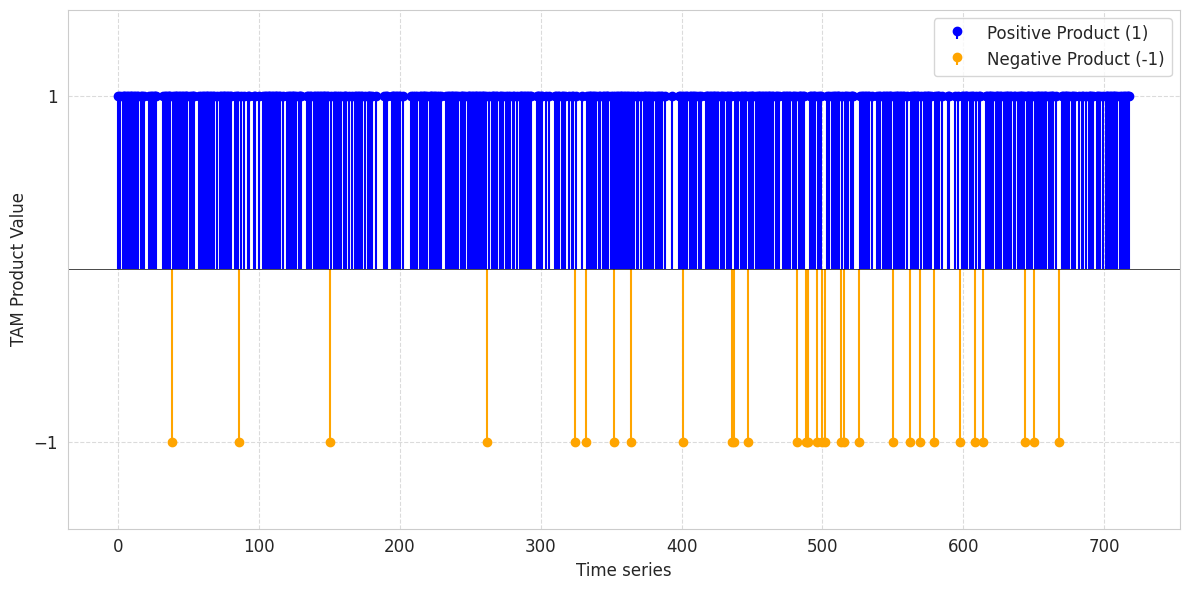

Frequency of Ternary Products for SOLUSDT (Lead) and RAYUSDT (Lag) at Lag 1:
 1    517
 0    170
-1     32
Name: count, dtype: int64
Number of (0, 0) pairs at Lag 1: 48

TAM-Z Score  (With Zeros)  at Lag-0 : 0.675
TAM-NZ Score (Without Zeros) at Lag-0 : 0.872


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming logretdf2 is your DataFrame with log returns for multiple coins
# Step 1: Select the coins
coins = ['SOLUSDT', 'RAYUSDT']

# Extract log return series and drop NaN for both coins
logret_series_sol = logretdf2['SOLUSDT'].dropna()
logret_series_ray = logretdf2['RAYUSDT'].dropna()

# Align indices to ensure matching lengths
common_index = logret_series_sol.index.intersection(logret_series_ray.index)
logret_series_sol = logret_series_sol[common_index]
logret_series_ray = logret_series_ray[common_index]

# Step 2: Normalize using Z-score for both coins
mean_logret_sol = logret_series_sol.mean()
std_logret_sol = logret_series_sol.std()
normalized_series_sol = (logret_series_sol - mean_logret_sol) / std_logret_sol
mean_logret_ray = logret_series_ray.mean()
std_logret_ray = logret_series_ray.std()
normalized_series_ray = (logret_series_ray - mean_logret_ray) / std_logret_ray

# Step 3: Apply ternary transformation with threshold epsilon = 1.7
epsilon = 0.18  # Threshold as specified
ternary_series_sol = pd.Series(np.where(normalized_series_sol >= epsilon, 1,
                                        np.where(normalized_series_sol <= -epsilon, -1, 0)),
                               index=normalized_series_sol.index)
ternary_series_ray = pd.Series(np.where(normalized_series_ray >= epsilon, 1,
                                        np.where(normalized_series_ray <= -epsilon, -1, 0)),
                               index=normalized_series_ray.index)

# Step 4: Shift RAYUSDT data 3 units forward (SOL leads, RAY follows)
ternary_series_ray_shifted = ternary_series_ray.shift(0)  # Positive shift to lag RAY behind SOL
# Align lengths by taking the common index after shifting (drop NaN from the end)
common_index_shifted = ternary_series_sol.index.intersection(ternary_series_ray_shifted.dropna().index)
ternary_series_sol = ternary_series_sol[common_index_shifted]
ternary_series_ray_shifted = ternary_series_ray_shifted[common_index_shifted]

# Step 5: Compute ternary products for lag=1
lag = 0
products = []
zero_zero_count = 0  # Count of (0, 0) pairs
for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
    x_i = ternary_series_sol.iloc[i]
    y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
    if x_i == 0 and y_i_k == 0:
        zero_zero_count += 1
        products.append(1)
    else:
        products.append(x_i * y_i_k)

# Convert to Series with aligned index
products_series = pd.Series(products, index=ternary_series_sol.index[max(0, -lag):len(ternary_series_sol) - max(0, lag)])

# Step 6: Count frequencies of 1, 0, and -1
product_counts = products_series.value_counts().reindex([1, 0, -1], fill_value=0)

# Step 7: Compute ATAM-Z and ATAM-NZ for lag=1
n_pairs = len(ternary_series_sol) - max(0, -lag)
n_nonzero_pairs = 0

# ATAM-Z (With Zeros)
uyum_with_zeros = 0
for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
    x_i = ternary_series_sol.iloc[i]
    y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
    if x_i == 0 and y_i_k == 0:
        uyum_with_zeros += 1
    else:
        uyum_with_zeros += x_i * y_i_k
atam_z_score = uyum_with_zeros / n_pairs if n_pairs > 0 else 0

# ATAM-NZ (Without Zeros)
uyum_without_zeros = 0
for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
    x_i = ternary_series_sol.iloc[i]
    y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
    if x_i != 0 and y_i_k != 0:  # Only consider non-zero pairs
        uyum_without_zeros += x_i * y_i_k
        n_nonzero_pairs += 1
atam_nz_score = uyum_without_zeros / n_nonzero_pairs if n_nonzero_pairs > 0 else 0

# Step 8: Visualize with lollipop plot (no markers for zero, with zero line)
x = np.arange(len(products_series))  # X-axis for each product value
plt.figure(figsize=(12, 6))

# Separate positive and negative values for color coding, exclude zero
positive = products_series == 1
negative = products_series == -1

# Plot positive values in blue (no zero markers)
plt.stem(x[positive], products_series[positive], linefmt='b-', markerfmt='bo', basefmt=' ', label='Positive Product (1)')

# Plot negative values in orange (no zero markers)
#plt.stem(x[negative], products_series[negative], linefmt='c-', markerfmt='o', basefmt=' ', label='Negative Product (-1)')
plt.stem(x[negative], products_series[negative], linefmt='orange', markerfmt='o', basefmt=' ', label='Negative Product (-1)')
# Add black zero line
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Graph settings
#plt.title('Ternary Products for SOLUSDT (Lead) and RAYUSDT (Lag) at Lag 1')
plt.xlabel('Time series',fontsize=12)
plt.ylabel('TAM Product Value',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks([-1, 1])  # Only -1 and 1 since zero markers are excluded
plt.ylim(-1.5, 1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("fig/tern_product.png",dpi=300)
plt.show()

# Display the counts and scores
print("Frequency of Ternary Products for SOLUSDT (Lead) and RAYUSDT (Lag) at Lag 1:")
print(product_counts)
print(f"Number of (0, 0) pairs at Lag 1: {zero_zero_count}")
print(f"\nTAM-Z Score  (With Zeros)  at Lag-{lag} : {atam_z_score:.3f}")
print(f"TAM-NZ Score (Without Zeros) at Lag-{lag} : {atam_nz_score:.3f}")

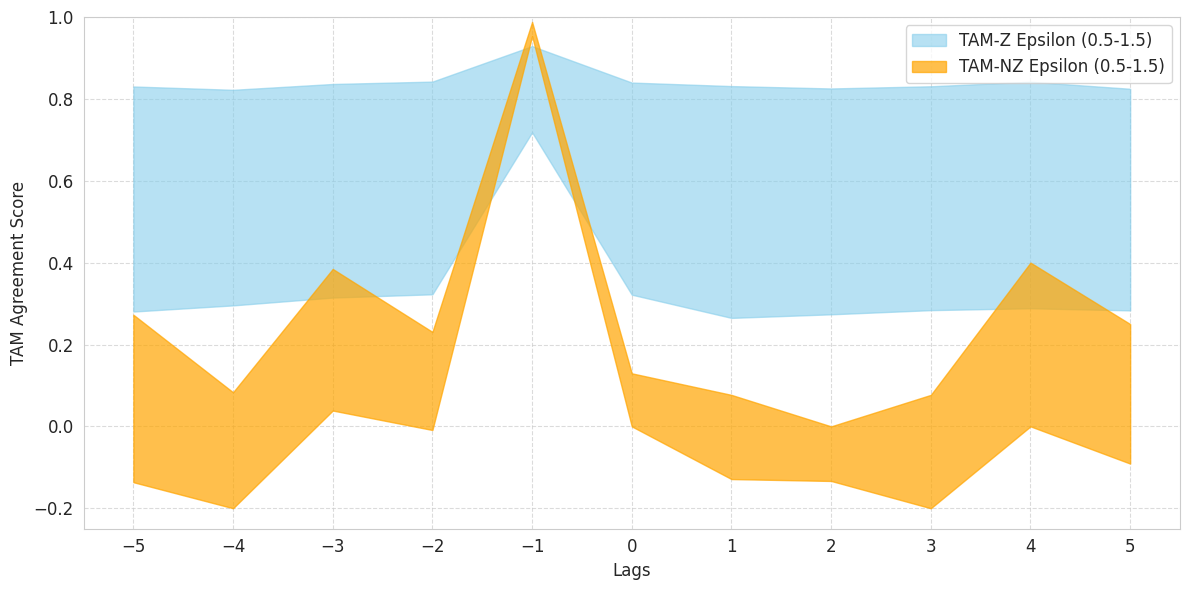

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming logretdf2 is your DataFrame with log returns for multiple coins
# Step 1: Select the coins
coins = ['SOLUSDT', 'RAYUSDT']

# Extract log return series and drop NaN for both coins
logret_series_sol = logretdf2['SOLUSDT'].dropna()
logret_series_ray = logretdf2['RAYUSDT'].dropna()

# Align indices to ensure matching lengths
common_index = logret_series_sol.index.intersection(logret_series_ray.index)
logret_series_sol = logret_series_sol[common_index]
logret_series_ray = logret_series_ray[common_index]

# Step 2: Normalize using Z-score for both coins
mean_logret_sol = logret_series_sol.mean()
std_logret_sol = logret_series_sol.std()
if std_logret_sol == 0:  # Avoid division by zero
    normalized_series_sol = pd.Series(0, index=logret_series_sol.index)
else:
    normalized_series_sol = (logret_series_sol - mean_logret_sol) / std_logret_sol

mean_logret_ray = logret_series_ray.mean()
std_logret_ray = logret_series_ray.std()
if std_logret_ray == 0:  # Avoid division by zero
    normalized_series_ray = pd.Series(0, index=logret_series_ray.index)
else:
    normalized_series_ray = (logret_series_ray - mean_logret_ray) / std_logret_ray

# Step 3: Define epsilon values from 0.5 to 1.5
epsilons = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]
#epsilons = [0.1,0.3,0.5, 0.7, 0.9, 1.1, 1.3, 1.5,1.7,1.9]
# Dictionary to store uyum scores for each epsilon and method
uyum_scores_all = {'With Zeros': {}, 'Without Zeros': {}}

# Step 4: Apply ternary transformation and compute TAM for each epsilon
for epsilon in epsilons:
    # Ternary transformation
    ternary_series_sol = pd.Series(np.where(normalized_series_sol >= epsilon, 1,
                                            np.where(normalized_series_sol <= -epsilon, -1, 0)),
                                   index=normalized_series_sol.index)
    ternary_series_ray = pd.Series(np.where(normalized_series_ray >= epsilon, 1,
                                            np.where(normalized_series_ray <= -epsilon, -1, 0)),
                                   index=normalized_series_ray.index)

    # Step 5: Shift RAYUSDT data 1 unit forward (SOL leads, RAY follows)
    ternary_series_ray_shifted = ternary_series_ray.shift(-1)  # Positive shift to lag RAY behind SOL
    # Align lengths by taking the common index after shifting (drop NaN from the end)
    common_index_shifted = ternary_series_sol.index.intersection(ternary_series_ray_shifted.dropna().index)
    ternary_series_sol = ternary_series_sol[common_index_shifted]
    ternary_series_ray_shifted = ternary_series_ray_shifted[common_index_shifted]

    # Step 6: Compute Adapted Ternary Agreement (TAM) for both methods
    lags = range(-5, 6)  # -5 to +5 inclusive

    # Method 1: With zeros (original TAM)
    for lag in lags:
        uyum = 0
        n_pairs = 0
        for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
            x_i = ternary_series_sol.iloc[i]
            y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
            if x_i == 0 and y_i_k == 0:
                uyum += 1
            else:
                uyum += x_i * y_i_k
            n_pairs += 1
        uyum_scores_all['With Zeros'].setdefault(epsilon, {})[lag] = uyum / n_pairs if n_pairs > 0 else 0

    # Method 2: Without zeros
    for lag in lags:
        uyum = 0
        n_nonzero_pairs = 0
        for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
            x_i = ternary_series_sol.iloc[i]
            y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
            if x_i != 0 and y_i_k != 0:  # Only consider non-zero pairs
                uyum += x_i * y_i_k  # 1 for same direction, -1 for opposite
                n_nonzero_pairs += 1
        uyum_scores_all['Without Zeros'].setdefault(epsilon, {})[lag] = uyum / n_nonzero_pairs if n_nonzero_pairs > 0 else 0

# Step 7: Convert uyum_scores to DataFrame for each method
uyum_df_with_zeros = pd.DataFrame(uyum_scores_all['With Zeros'])
uyum_df_without_zeros = pd.DataFrame(uyum_scores_all['Without Zeros'])

# Step 8: Find min and max uyum scores across epsilons for each lag
min_max_with_zeros = pd.DataFrame(index=lags, columns=['Min Uyum', 'Max Uyum'])
min_max_without_zeros = pd.DataFrame(index=lags, columns=['Min Uyum', 'Max Uyum'])

for lag in lags:
    min_max_with_zeros.loc[lag] = [uyum_df_with_zeros.loc[lag].min(), uyum_df_with_zeros.loc[lag].max()]
    min_max_without_zeros.loc[lag] = [uyum_df_without_zeros.loc[lag].min(), uyum_df_without_zeros.loc[lag].max()]

# Save tables to CSV
min_max_with_zeros.to_csv('min_max_with_zeros_SOL_RAY.csv')
min_max_without_zeros.to_csv('min_max_without_zeros_SOL_RAY.csv')

# Step 9 (Revised): Combine both plots into a single figure with layered fills

fig, ax = plt.subplots(figsize=(12, 6))

# Compute min-max for each method
lower_with_zeros = uyum_df_with_zeros.min(axis=1)
upper_with_zeros = uyum_df_with_zeros.max(axis=1)

lower_without_zeros = uyum_df_without_zeros.min(axis=1)
upper_without_zeros = uyum_df_without_zeros.max(axis=1)

# Fill Between – two layers
ax.fill_between(lags, lower_with_zeros, upper_with_zeros,
                color='skyblue', alpha=0.6, label='TAM-Z Epsilon (0.5-1.5)')
ax.fill_between(lags, lower_without_zeros, upper_without_zeros,
                color='orange', alpha=0.7, label='TAM-NZ Epsilon (0.5-1.5)')

# Common plot settings
#ax.set_title('Combined Ternary Agreement Ranges for SOLUSDT (Lead) and RAYUSDT (Lag)')
ax.set_xlabel('Lags',fontsize=12)
ax.set_ylabel('TAM Agreement Score',fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-0.25, 1)
ax.legend(fontsize=12,loc="upper right")
ax.tick_params(axis='both', labelsize=12)
plt.xticks(lags)
plt.tight_layout()
plt.savefig("fig/epsilon_sol_ray.png",dpi=300)
plt.show()


In [ ]:
close_series_sol = closedf2['SOLUSDT'].dropna()
close_series_sol

Time
1.758373e+12    237.44
1.758377e+12    238.77
1.758380e+12    240.10
1.758384e+12    240.39
1.758388e+12    239.14
                 ...  
1.760947e+12    193.00
1.760951e+12    193.20
1.760954e+12    191.62
1.760958e+12    192.20
1.760962e+12    192.09
Name: SOLUSDT, Length: 720, dtype: float64

In [ ]:
close_series_ray = closedf2['RAYUSDT'].dropna()
close_series_ray

Time
1.758373e+12    3.140
1.758377e+12    3.170
1.758380e+12    3.182
1.758384e+12    3.171
1.758388e+12    3.156
                ...  
1.760947e+12    1.927
1.760951e+12    1.926
1.760954e+12    1.906
1.760958e+12    1.911
1.760962e+12    1.912
Name: RAYUSDT, Length: 720, dtype: float64

/Users/mustafatasci/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


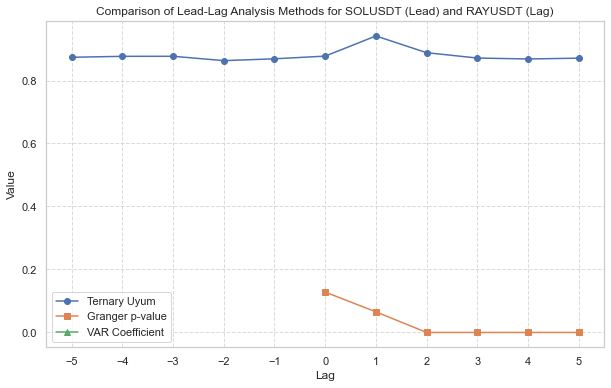

Lead-Lag Analysis Comparison for SOLUSDT and RAYUSDT:
   Ternary Uyum Granger p-value VAR Coefficient Wavelet Correlation
-5     0.873773             NaN             NaN                 NaN
-4     0.876751             NaN             NaN                 NaN
-3     0.876923             NaN             NaN                 NaN
-2     0.863128             NaN             NaN                 NaN
-1     0.868898             NaN             NaN                 NaN
0      0.877437        0.128249             NaN                 NaN
1      0.941423        0.065537             NaN                 NaN
2      0.888268             0.0             NaN                 NaN
3      0.871329             0.0             NaN                 NaN
4      0.868347             0.0             NaN                 NaN
5      0.870968             0.0             NaN                 NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
#from pywt import cwt, Morlet  # 'ricker' yerine 'Morlet' kullanıyoruz

# Assuming logretdf2 (for ternary) and closedf2 (for other methods) are your DataFrames
# logretdf2 contains log returns, closedf2 contains OHLC data

# Step 1: Prepare data for SOLUSDT and RAYUSDT
# For ternary (using logretdf2)
logret_series_sol = logretdf2['SOLUSDT'].dropna()
logret_series_ray = logretdf2['RAYUSDT'].dropna()
common_index = logret_series_sol.index.intersection(logret_series_ray.index)
logret_series_sol = logret_series_sol[common_index]
logret_series_ray = logret_series_ray[common_index]

# Normalize for ternary
mean_logret_sol = logret_series_sol.mean()
std_logret_sol = logret_series_sol.std()
normalized_series_sol = (logret_series_sol - mean_logret_sol) / std_logret_sol
mean_logret_ray = logret_series_ray.mean()
std_logret_ray = logret_series_ray.std()
normalized_series_ray = (logret_series_ray - mean_logret_ray) / std_logret_ray

# For other methods (using closedf2)
close_series_sol = closedf2['SOLUSDT'].dropna()
close_series_ray = closedf2['RAYUSDT'].dropna()
common_index_close = close_series_sol.index.intersection(close_series_ray.index)
close_series_sol = close_series_sol[common_index_close]
close_series_ray = close_series_ray[common_index_close]

# Step 2: Shift RAYUSDT data by 1 minute forward (SOL leads, RAY lags)
close_series_ray_shifted = close_series_ray.shift(1)  # Lag RAY by 1 time step
common_index_shifted = close_series_sol.index.intersection(close_series_ray_shifted.dropna().index)
close_series_sol = close_series_sol[common_index_shifted]
close_series_ray_shifted = close_series_ray_shifted[common_index_shifted]

# Step 3: Ternary transformation and TAM computation
epsilon = 1.7  # Threshold as specified
ternary_series_sol = pd.Series(np.where(normalized_series_sol >= epsilon, 1,
                                        np.where(normalized_series_sol <= -epsilon, -1, 0)),
                               index=normalized_series_sol.index)
ternary_series_ray = pd.Series(np.where(normalized_series_ray >= epsilon, 1,
                                        np.where(normalized_series_ray <= -epsilon, -1, 0)),
                               index=normalized_series_ray.index)
ternary_series_ray_shifted = ternary_series_ray.shift(1)
common_index_ternary = ternary_series_sol.index.intersection(ternary_series_ray_shifted.dropna().index)
ternary_series_sol = ternary_series_sol[common_index_ternary]
ternary_series_ray_shifted = ternary_series_ray_shifted[common_index_ternary]

lags = range(-5, 6)  # -5 to +5 inclusive
uyum_scores = {}
for lag in lags:
    uyum = 0
    n_pairs = 0
    for i in range(max(0, -lag), len(ternary_series_sol) - max(0, lag)):
        x_i = ternary_series_sol.iloc[i]
        y_i_k = ternary_series_ray_shifted.iloc[i + lag] if 0 <= i + lag < len(ternary_series_ray_shifted) else 0
        if x_i == 0 and y_i_k == 0:
            uyum += 1
        else:
            uyum += x_i * y_i_k
        n_pairs += 1
    uyum_scores[lag] = uyum / n_pairs if n_pairs > 0 else 0

# Step 4: Granger Causality
granger_results = {}
for lag in lags:
    if lag >= 0:
        data = pd.concat([close_series_sol.shift(lag), close_series_ray_shifted], axis=1).dropna()
        if not data.empty:
            test_result = grangercausalitytests(data, maxlag=1, verbose=False)
            granger_results[lag] = test_result[1][0]['ssr_chi2test'][1]  # p-value
"""
# Step 5: VAR Analysis (simplified for lag 1)
var_data = pd.concat([close_series_sol, close_series_ray_shifted], axis=1).dropna()
var_data.columns = ['SOLUSDT', 'RAYUSDT']
model = VAR(var_data)
results = model.fit(maxlags=1)
var_coefficients = results.params.loc[ 'SOLUSDT','RAYUSDT']  # Coefficient of SOLUSDT on RAYUSDT

# Step 6: Wavelet Transform (using Morlet wavelet)
widths = np.arange(1, 10)  # Example wavelet scales
cwt_sol = cwt(close_series_sol.values, Morlet(widths.size), widths)
cwt_ray = cwt(close_series_ray_shifted.values, Morlet(widths.size), widths)
wavelet_correlation = np.mean(np.abs(cwt_sol) * np.abs(cwt_ray)) / (np.std(cwt_sol) * np.std(cwt_ray))  # Simplified correlation
"""
# Step 7: Create comparison table
comparison_df = pd.DataFrame(index=lags, columns=['Ternary Uyum', 'Granger p-value', 'VAR Coefficient', 'Wavelet Correlation'])
for lag in lags:
    comparison_df.loc[lag, 'Ternary Uyum'] = uyum_scores.get(lag, np.nan)
    comparison_df.loc[lag, 'Granger p-value'] = granger_results.get(lag, np.nan)
    #comparison_df.loc[lag, 'VAR Coefficient'] = var_coefficients if not np.isnan(var_coefficients) else np.nan
   # comparison_df.loc[lag, 'Wavelet Correlation'] = wavelet_correlation if not np.isnan(wavelet_correlation) else np.nan

# Save to CSV
comparison_df.to_csv('lag_comparison_SOL_RAY.csv')

# Step 8: Visualize
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Ternary Uyum'], marker='o', label='Ternary Uyum')
plt.plot(comparison_df.index, comparison_df['Granger p-value'], marker='s', label='Granger p-value')
plt.plot(comparison_df.index, comparison_df['VAR Coefficient'], marker='^', label='VAR Coefficient')
#plt.plot(comparison_df.index, comparison_df['Wavelet Correlation'], marker='d', label='Wavelet Correlation')
plt.title('Comparison of Lead-Lag Analysis Methods for SOLUSDT (Lead) and RAYUSDT (Lag)')
plt.xlabel('Lag')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(lags)
plt.legend()
plt.show()

# Display the table
print("Lead-Lag Analysis Comparison for SOLUSDT and RAYUSDT:")
print(comparison_df.round(3))

In [ ]:
closedf2.head()

,SOLUSDT,ETHUSDT,BNTUSDT,WBTCUSDT,XRPUSDT,BTCUSDT,YFIUSDT,RAYUSDT,GLMUSDT,VTHOUSDT
Time,,,,,,,,,,
1.758373e+12,237.44,4468.15,0.7198,115932.03,2.9835,115915.80,5320.0,3.140,0.2396,0.001813
1.758377e+12,238.77,4487.18,0.7248,115985.70,2.9812,115970.36,5360.0,3.170,0.2411,0.001825
1.758380e+12,240.10,4498.20,0.7270,116013.17,2.9893,115986.69,5385.0,3.182,0.2416,0.001826
1.758384e+12,240.39,4502.57,0.7274,116067.16,2.9915,116027.94,5387.0,3.171,0.2413,0.001826
1.758388e+12,239.14,4486.09,0.7245,115845.04,2.9824,115821.72,5367.0,3.156,0.2410,0.001819
